In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier

import random
import numpy as np
import torch

from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix
import numpy as np
import time

from torch.utils.data import Dataset, DataLoader, random_split


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [4]:
# # Manual FASTA parsing (without Biopython)
# fasta_path = "../data//naturalAMPs_APD2024a-ADAM.fasta.txt"

# # Read lines from the FASTA file
# with open(fasta_path, "r") as f:
#     lines = f.read().strip().splitlines()

# # Parse into (ID, Sequence) pairs
# records = []
# current_id = None
# current_seq = []
# for line in lines:
#     if line.startswith(">"):
#         if current_id is not None:
#             records.append([current_id, ''.join(current_seq)])
#         current_id = line[1:].strip()
#         current_seq = []
#     else:
#         current_seq.append(line.strip())

# # Add the last record
# if current_id is not None:
#     records.append([current_id, ''.join(current_seq)])

# # Convert to DataFrame
# df_fasta_manual = pd.DataFrame(records, columns=["Peptide ID", "Sequence"])
# df_fasta_manual.to_csv("../data/naturalAMPs_APD2024a-ADAM.csv", index=False)


# Manual FASTA parsing (without Biopython)
# fasta_path = "../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta"

# # Read lines from the FASTA file
# with open(fasta_path, "r") as f:
#     lines = f.read().strip().splitlines()

# # Parse into (ID, Sequence) pairs
# records = []
# current_id = None
# current_seq = []
# for line in lines:
#     if line.startswith(">"):
#         if current_id is not None:
#             records.append([current_id, ''.join(current_seq)])
#         current_id = line[1:].strip()
#         current_seq = []
#     else:
#         current_seq.append(line.strip())

# # Add the last record
# if current_id is not None:
#     records.append([current_id, ''.join(current_seq)])

# # Convert to DataFrame
# df_fasta_manual = pd.DataFrame(records, columns=["Peptide ID", "Sequence"])
# df_fasta_manual.to_csv("../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta.csv", index=False)



# fasta_path = "../data/uniprotkb_length_5_TO_30_NOT_antimicrob_2025_04_14.fasta (1)"

# # Read lines from the FASTA file
# with open(fasta_path, "r") as f:
#     lines = f.read().strip().splitlines()

# # Parse into (ID, Sequence) pairs
# records = []
# current_id = None
# current_seq = []
# for line in lines:
#     if line.startswith(">"):
#         if current_id is not None:
#             records.append([current_id, ''.join(current_seq)])
#         current_id = line[1:].strip()
#         current_seq = []
#     else:
#         current_seq.append(line.strip())

# # Add the last record
# if current_id is not None:
#     records.append([current_id, ''.join(current_seq)])

# # Convert to DataFrame
# df_fasta_manual = pd.DataFrame(records, columns=["Peptide ID", "Sequence"])
# df_fasta_manual.to_csv("../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta1.csv", index=False)

## Data

In [5]:
adam_df = pd.read_csv("../data/naturalAMPs_APD2024a-ADAM.csv")
uniprot_df = pd.read_csv("../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta.csv")
uniprot_df1 = pd.read_csv("../data/uniprotkb_length_10_TO_80_NOT_antimicro_2025_04_14.fasta1.csv")
uniprot_df = pd.concat([uniprot_df, uniprot_df1], ignore_index=True)

183 2
Range of sequence lengths: 181


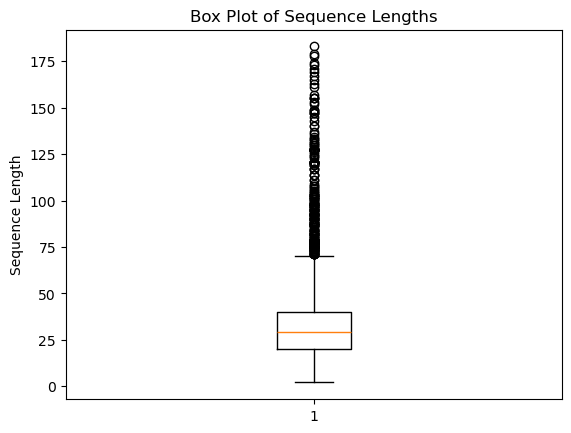

Mean sequence length: 34.4038112522686
Median sequence length: 29.0
Standard deviation of sequence lengths: 23.719451486351453


In [6]:
import matplotlib.pyplot as plt

# Calculate sequence lengths
sequence_lengths = adam_df['Sequence'].apply(len)

# Calculate the range of sequence lengths
length_range = sequence_lengths.max() - sequence_lengths.min()
print(sequence_lengths.max(),sequence_lengths.min())
print(f"Range of sequence lengths: {length_range}")

# Draw a box plot
plt.boxplot(sequence_lengths)
plt.title("Box Plot of Sequence Lengths")
plt.ylabel("Sequence Length")
plt.show()

# Calculate and display distribution statistics
mean_length = sequence_lengths.mean()
median_length = sequence_lengths.median()
std_dev_length = sequence_lengths.std()

print(f"Mean sequence length: {mean_length}")
print(f"Median sequence length: {median_length}")
print(f"Standard deviation of sequence lengths: {std_dev_length}")

# adam_df = adam_df.drop(columns=['Sequence Length'])

/tmp/ipykernel_57360/3724575810.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_uniprot_df = uniprot_df.groupby('Sequence Length', group_keys=False).apply(


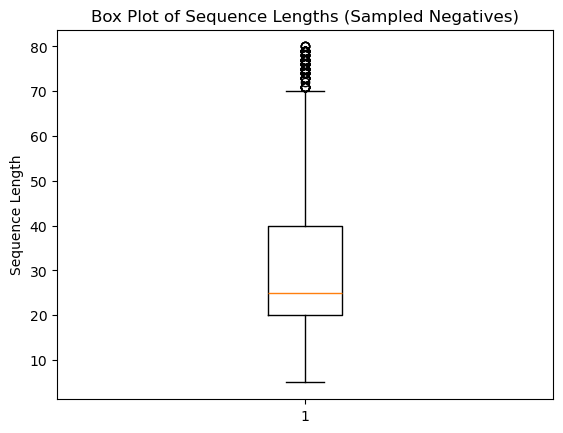

                                              Peptide ID  \
81192  sp|P12997|BIOB_CITFR Biotin synthase (Fragment...   
81715  sp|P85089|GTF2_LEUME Dextransucrase 2 (Fragmen...   
81193  sp|P13071|BIOA_CITFR Adenosylmethionine-8-amin...   
81176  sp|P0DKJ0|P160B_ARATH Peptide encoded by miPEP...   
81362  sp|P41853|FARP_ARTTR FMRFamide-like neuropepti...   
...                                                  ...   
52463  tr|F5P1Z5|F5P1Z5_SHIFL ATP synthase subunit c ...   
55078  sp|O28338|PURS_ARCFU Phosphoribosylformylglyci...   
26968  tr|A0A4D5YML7|A0A4D5YML7_9ROSI ATP synthase su...   
39606  tr|A0A7L3GVD8|A0A7L3GVD8_9PASS Serine palmitoy...   
30647  tr|A0A5C1DC31|A0A5C1DC31_9ANNE Cytochrome c ox...   

                                                Sequence  
81192                                              MAHSS  
81715                                              DSTNY  
81193                                              MTTDD  
81176                                      

In [7]:
# Calculate sequence lengths for uniprot_df
uniprot_df['Sequence Length'] = uniprot_df['Sequence'].apply(len)

# Calculate sequence lengths for adam_df
adam_df['Sequence Length'] = adam_df['Sequence'].apply(len)

# Perform stratified sampling to select more samples
sampled_uniprot_df = uniprot_df.groupby('Sequence Length', group_keys=False).apply(
    lambda x: x.sample(
        n=min(len(x), int(1.5 * adam_df['Sequence Length'].value_counts().get(x.name, 0))),  # Increase sample size
        random_state=42
    )
)

# Drop the 'Sequence Length' column after sampling
sampled_uniprot_df = sampled_uniprot_df.drop(columns=['Sequence Length'])
adam_df = adam_df.drop(columns=['Sequence Length'])

# Draw a box plot to visualize the distribution
plt.boxplot(sampled_uniprot_df['Sequence'].apply(len))
plt.title("Box Plot of Sequence Lengths (Sampled Negatives)")
plt.ylabel("Sequence Length")
plt.show()

print(sampled_uniprot_df)

### data organization

In [8]:

adam_df['label'] = 1
sampled_uniprot_df['label'] = 0
adam_df.columns = ["Peptide ID", "Sequences", 'label']
sampled_uniprot_df.columns = ["Peptide ID", "Sequences" , 'label']
df = pd.concat([adam_df, sampled_uniprot_df], ignore_index=True)

max_length = df['Sequences'].str.len().max()
print(max_length)
# df['Sequences'] = df['Sequences'].apply(lambda x: x.ljust(max_length, 'X'))

unique_letters = set(''.join(df["Sequences"]))
print(unique_letters)
print(len(unique_letters))
amino_acids = set("ACDEFGHIKLMNPQRSTVWYX")
non_standard_amino_acids = unique_letters - amino_acids
print(non_standard_amino_acids)
b_count = df["Sequences"].str.count('B').sum()
print(f"Number of 'B' values: {b_count}")

# Filter out sequences containing non-standard amino acids
df = df[~df['Sequences'].str.contains('|'.join(non_standard_amino_acids))]
print(f"Number of sequences after filtering: {len(df)}")
df = df.drop_duplicates(subset='Sequences')

X = df["Sequences"]
y = df["label"]

# Split into train (70%), validation (15%), test (15%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 2: Split train+val into train and val (stratified)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)  # 0.1765 to maintain 15% of original dataset




183
{'G', 'R', 'M', 'Q', 'B', 'N', 'E', 'S', 'V', 'T', 'I', 'Z', 'L', 'Y', 'W', 'D', 'H', 'F', 'C', 'K', 'A', 'P', 'X'}
23
{'Z', 'B'}
Number of 'B' values: 2
Number of sequences after filtering: 7042


### dataset

In [9]:

# Define One-Hot Encoding Function for DNA Sequences in PyTorch
def one_hot_torch(seq: str, dtype=torch.float32):
    amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    seq_bytes = torch.ByteTensor(list(bytes(seq, "utf-8")))
    aa_bytes = torch.ByteTensor(list(bytes(amino_acids, "utf-8")))
    arr = torch.zeros(len(amino_acids), len(seq_bytes), dtype=dtype)
    for i, aa in enumerate(aa_bytes):
        arr[i, seq_bytes == aa] = 1
    return arr


class SequenceDataset(Dataset):
    def __init__(self, sequences, labels, one_hot_dtype=torch.float32):
        self.sequences = sequences
        self.labels = labels
        self.one_hot_dtype = one_hot_dtype

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences.iloc[idx]
        label = self.labels.iloc[idx]
        length = len(seq.replace("X", ""))  # unpadded length
        return one_hot_torch(seq, dtype=self.one_hot_dtype), torch.tensor(label, dtype=torch.float32), length

from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence

def collate_and_pack(batch):
    # batch = list of (tensor_seq, label, length)
    sequences, labels, lengths = zip(*batch)

    # lengths as tensor
    lengths = torch.tensor(lengths)

    # Sort by descending length (required by pack_padded_sequence)
    sorted_indices = torch.argsort(lengths, descending=True)
    sequences = [sequences[i] for i in sorted_indices]
    labels = torch.tensor([labels[i] for i in sorted_indices])
    lengths = lengths[sorted_indices]

    # Stack to shape: (batch_size, 20, seq_len) and transpose for LSTM input
    # LSTM expects input of shape (seq_len, batch_size, features)
    sequences = [seq.T for seq in sequences]  # Transpose each [20, L] to [L, 20]
    padded_seqs = pad_sequence(sequences, batch_first=False)  # shape: [max_len, batch, features]

    # Pack the sequence
    packed_input = pack_padded_sequence(padded_seqs, lengths.cpu(), batch_first=False)

    return packed_input, labels


In [10]:
# Define DataLoaders

train_dataset = SequenceDataset(X_train, y_train)
val_dataset = SequenceDataset(X_val, y_val)
test_dataset = SequenceDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_and_pack)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)

    
# Display dataset sizes
dataset_sizes = {
    "Train": len(train_dataset),
    "Validation": len(val_dataset),
    "Test": len(test_dataset)
}
print("Dataset sizes:")
for name, size in dataset_sizes.items():
    print(f"{name}: {size}")

Dataset sizes:
Train: 4067
Validation: 872
Test: 872


## testing

In [11]:
import torch
import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0
        )

        # Classifier
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        # packed_input: PackedSequence
        packed_output, (hn, cn) = self.lstm(packed_input)

        # hn: [num_layers, batch_size, hidden_dim]
        # We'll use the **last layer's** hidden state as feature
        last_hidden = hn[-1]  # shape: [batch_size, hidden_dim]

        # Fully connected + sigmoid
        out = self.fc(last_hidden)       # shape: [batch_size, 1]
        out = self.sigmoid(out).squeeze(1)  # shape: [batch_size]
        return out


In [155]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score

from torch.utils.tensorboard import SummaryWriter
import datetime

def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_val_loss = 1000.0
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_auc': []}

    # Set up TensorBoard writer
    log_dir = f"runs/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)

        # Run evaluation
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device)

        # Logging
        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        print(f"Epoch [{epoch}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val AUC: {val_auc:.4f}")

        # Save to history
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_auc'].append(val_auc)

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            # torch.save(model.state_dict(), 'best_model.pt')

    writer.close()
    return history

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, recall_score

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)

    # Convert predicted probabilities to binary predictions
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]

    # Metrics
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    # Confusion matrix
    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)  # handle corner cases

    # Sensitivity and specificity
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        # Print metrics
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity (Recall for Positive Class): {sensitivity:.4f}")
        print(f"Specificity (Recall for Negative Class): {specificity:.4f}")

    return avg_loss, acc, auc


model = LSTMClassifier(hidden_dim=64)
history = train_model(model, train_loader, val_loader, num_epochs=10)


Epoch [1/10] - Train Loss: 0.6597, Val Loss: 0.5910, Val Acc: 0.6250, Val AUC: 0.8321
Epoch [2/10] - Train Loss: 0.5181, Val Loss: 0.4545, Val Acc: 0.8200, Val AUC: 0.8879
Epoch [3/10] - Train Loss: 0.4452, Val Loss: 0.4306, Val Acc: 0.8406, Val AUC: 0.9012
Epoch [4/10] - Train Loss: 0.4989, Val Loss: 0.5526, Val Acc: 0.6869, Val AUC: 0.8404
Epoch [5/10] - Train Loss: 0.4587, Val Loss: 0.4103, Val Acc: 0.8372, Val AUC: 0.9125
Epoch [6/10] - Train Loss: 0.4230, Val Loss: 0.4271, Val Acc: 0.8268, Val AUC: 0.9173
Epoch [7/10] - Train Loss: 0.4311, Val Loss: 0.3782, Val Acc: 0.8509, Val AUC: 0.9236
Epoch [8/10] - Train Loss: 0.3921, Val Loss: 0.3834, Val Acc: 0.8452, Val AUC: 0.9213
Epoch [9/10] - Train Loss: 0.3825, Val Loss: 0.3533, Val Acc: 0.8624, Val AUC: 0.9285
Epoch [10/10] - Train Loss: 0.3809, Val Loss: 0.3461, Val Acc: 0.8647, Val AUC: 0.9308


### adding in regularization

In [ ]:
import torch
import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0  # LSTM dropout applies only between layers
        )

        # Dropout after LSTM (even if 1 layer)
        self.dropout = nn.Dropout(dropout)

        # Fully connected classifier
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        packed_output, (hn, cn) = self.lstm(packed_input)

        # Get the last hidden state from the last layer
        last_hidden = hn[-1]  # shape: [batch_size, hidden_dim]

        # Apply dropout
        dropped = self.dropout(last_hidden)

        # Fully connected + sigmoid
        out = self.fc(dropped)       # shape: [batch_size, 1]
        out = self.sigmoid(out).squeeze(1)  # shape: [batch_size]
        return out


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)  # L2 regularization

    best_val_loss = 1000.0
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_auc': []}

    # Set up TensorBoard writer
    log_dir = f"runs/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)   
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)

        # Run evaluation
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        # Logging
        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        print(f"Epoch [{epoch}/{num_epochs}] - "
              f"Train Loss: {avg_train_loss:.4f}, "
              f"Val Loss: {val_loss:.4f}, "
              f"Val Acc: {val_acc:.4f}, "
              f"Val AUC: {val_auc:.4f}")

        # Save to history
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_auc'].append(val_auc)

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pt')

    writer.close()
    return history



from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, recall_score

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)

    # Convert predicted probabilities to binary predictions
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]

    # Metrics
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    # Confusion matrix
    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)  # handle corner cases

    # Sensitivity and specificity
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        # Print metrics
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity (Recall for Positive Class): {sensitivity:.4f}")
        print(f"Specificity (Recall for Negative Class): {specificity:.4f}")

    return avg_loss, acc, auc

model = LSTMClassifier(input_dim=20, hidden_dim=64, dropout=0.5)
history = train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3,
                      weight_decay=1e-4, verbose=True)



Confusion Matrix:
[[401 160]
 [ 89 407]]
Sensitivity (Recall for Positive Class): 0.8206
Specificity (Recall for Negative Class): 0.7148
Epoch [1/10] - Train Loss: 0.6630, Val Loss: 0.5471, Val Acc: 0.7644, Val AUC: 0.8299

Confusion Matrix:
[[460 101]
 [101 395]]
Sensitivity (Recall for Positive Class): 0.7964
Specificity (Recall for Negative Class): 0.8200
Epoch [2/10] - Train Loss: 0.5161, Val Loss: 0.4849, Val Acc: 0.8089, Val AUC: 0.8625

Confusion Matrix:
[[192 369]
 [ 29 467]]
Sensitivity (Recall for Positive Class): 0.9415
Specificity (Recall for Negative Class): 0.3422
Epoch [3/10] - Train Loss: 0.6564, Val Loss: 0.6466, Val Acc: 0.6235, Val AUC: 0.8047

Confusion Matrix:
[[424 137]
 [119 377]]
Sensitivity (Recall for Positive Class): 0.7601
Specificity (Recall for Negative Class): 0.7558
Epoch [4/10] - Train Loss: 0.5960, Val Loss: 0.5372, Val Acc: 0.7578, Val AUC: 0.8364

Confusion Matrix:
[[458 103]
 [ 77 419]]
Sensitivity (Recall for Positive Class): 0.8448
Specificity (R

## Modelling on general AMP data (bayesian optimization)

### LSTM

In [12]:

import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime


class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        packed_output, (hn, cn) = self.lstm(packed_input)
        last_hidden = hn[-1]
        dropped = self.dropout(last_hidden)
        out = self.fc(dropped)
        out = self.sigmoid(out).squeeze(1)
        return out


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss



def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2)

    model = LSTMClassifier(input_dim=20, hidden_dim=hidden_dim, num_layers=num_layers, dropout=dropout)
    val_auc = train_model(model, train_loader, val_loader, num_epochs=20, lr=lr,
                          weight_decay=weight_decay, verbose=False)
    return val_auc


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("Best hyperparameters:", study.best_trial.params)
lstm_best_param = study.best_trial.params

[I 2025-04-23 13:40:09,815] A new study created in memory with name: no-name-72e22362-9ee0-4827-95bd-29b1edf0f97d
[W 2025-04-23 13:40:24,797] Trial 0 failed with parameters: {'hidden_dim': 55, 'num_layers': 3, 'dropout': 0.34473061470148847, 'lr': 0.008950764073931026, 'weight_decay': 0.0019483074746614874} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.10/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_57360/14054317.py", line 128, in objective
    val_auc = train_model(model, train_loader, val_loader, num_epochs=20, lr=lr,
  File "/tmp/ipykernel_57360/14054317.py", line 56, in train_model
    loss.backward()
  File "/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.10/site-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/mnt/storageG1/lwang/miniconda3/envs/new-ml

KeyboardInterrupt: 

#### testing

In [35]:
study.best_trial.params

{'hidden_dim': 74,
 'num_layers': 3,
 'dropout': 0.3037059572844035,
 'lr': 0.00774103421243492,
 'weight_decay': 2.4221276513292614e-05}

In [145]:
# model = LSTMClassifier(input_dim=20, hidden_dim=47, num_layers=2, dropout=0.18950252633567022)
# history = train_model(model, train_loader, val_loader, num_epochs=19, lr=0.009528266081905703,
#                       weight_decay=1.1052415577383506e-05, verbose=True)

model = LSTMClassifier(input_dim=20, hidden_dim=lstm_best_param['hidden_dim'], num_layers=lstm_best_param['num_layers'], dropout= lstm_best_param['dropout'])
history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_best_param['lr'],
                      weight_decay=lstm_best_param['weight_decay'], verbose=True, train=False)
criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")




Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [1/20] - Train Loss: 0.6918, Val Loss: 0.6884, Val Acc: 0.5444, Val AUC: 0.6068

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [2/20] - Train Loss: 0.6898, Val Loss: 0.6890, Val Acc: 0.5444, Val AUC: 0.6575

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [3/20] - Train Loss: 0.6892, Val Loss: 0.6877, Val Acc: 0.5444, Val AUC: 0.6705

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [4/20] - Train Loss: 0.6859, Val Loss: 0.6871, Val Acc: 0.5444, Val AUC: 0.6869

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [5/20] - Train Loss: 0.6841, Val Loss: 0.6841, Val Acc: 0.5444, Val AUC: 0.7063


KeyboardInterrupt: 

### biLSTM

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime

# Updated BiLSTM with flatten layer as previously defined
class BiLSTMWithFlattenClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3, max_seq_len=100):
        super(BiLSTMWithFlattenClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.max_seq_len = max_seq_len

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(max_seq_len * hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        batch_size, seq_len, feature_dim = lstm_out.size()

        if seq_len < self.max_seq_len:
            pad_len = self.max_seq_len - seq_len
            pad = torch.zeros(batch_size, pad_len, feature_dim, device=lstm_out.device)
            lstm_out = torch.cat([lstm_out, pad], dim=1)
        elif seq_len > self.max_seq_len:
            lstm_out = lstm_out[:, :self.max_seq_len, :]

        dropped = self.dropout(lstm_out)
        flat = dropped.contiguous().view(batch_size, -1)
        out = self.fc(flat)
        return self.sigmoid(out).squeeze(1)

# Evaluation function
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc

# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000.0

    log_dir = f"runs-bilstm_flatten/BiLSTM_Flatten_Optuna_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model-bilstm.pt')

    writer.close()
    return best_val_loss

# Optuna objective function
def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2)
    max_seq_len = 100  # fixed for now; match your padding/truncation

    model = BiLSTMWithFlattenClassifier(
        input_dim=20,
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        dropout=dropout,
        max_seq_len=max_seq_len
    )

    val_auc = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=10,
        lr=lr,
        weight_decay=weight_decay,
        verbose=False
    )
    return val_auc

# Usage (uncomment and run in your local environment):
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_best_param = study.best_trial.params

[I 2025-04-19 17:02:11,381] A new study created in memory with name: no-name-b26d41e5-5b22-487a-927f-8e71f08cae60
[I 2025-04-19 17:04:26,631] Trial 0 finished with value: 0.2602984458208084 and parameters: {'hidden_dim': 44, 'num_layers': 2, 'dropout': 0.21839908879243236, 'lr': 0.00076605000375419, 'weight_decay': 0.003205826180974212}. Best is trial 0 with value: 0.2602984458208084.
[I 2025-04-19 17:07:50,919] Trial 1 finished with value: 0.2747341035043492 and parameters: {'hidden_dim': 85, 'num_layers': 2, 'dropout': 0.32812227261038773, 'lr': 0.0009471445496245934, 'weight_decay': 0.005203843007063293}. Best is trial 0 with value: 0.2602984458208084.
[I 2025-04-19 17:09:00,636] Trial 2 finished with value: 0.2049465661539751 and parameters: {'hidden_dim': 51, 'num_layers': 1, 'dropout': 0.416685029891974, 'lr': 0.009983247660693553, 'weight_decay': 0.0026246839387646355}. Best is trial 2 with value: 0.2049465661539751.
[I 2025-04-19 17:10:26,562] Trial 3 finished with value: 0.206

Best hyperparameters: {'hidden_dim': 118, 'num_layers': 1, 'dropout': 0.3737648901755298, 'lr': 0.0069931464580274445, 'weight_decay': 0.0009766140966463652}


In [43]:
bilstm_best_param

{'hidden_dim': 118,
 'num_layers': 1,
 'dropout': 0.3737648901755298,
 'lr': 0.0069931464580274445,
 'weight_decay': 0.0009766140966463652}

In [46]:
# model = LSTMClassifier(input_dim=20, hidden_dim=47, num_layers=2, dropout=0.18950252633567022)
# history = train_model(model, train_loader, val_loader, num_epochs=19, lr=0.009528266081905703,
#                       weight_decay=1.1052415577383506e-05, verbose=True)

model = LSTMClassifier(input_dim=20, hidden_dim=bilstm_best_param['hidden_dim'], num_layers=bilstm_best_param['num_layers'], dropout= bilstm_best_param['dropout'])
history = train_model(model, train_loader, val_loader, num_epochs=30, lr=bilstm_best_param['lr'],
                      weight_decay=bilstm_best_param['weight_decay'], verbose=True)
criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")


Confusion Matrix:
[[539  22]
 [284 212]]
Sensitivity: 0.4274, Specificity: 0.9608
Epoch [1/30] - Train Loss: 0.6032, Val Loss: 0.5549, Val Acc: 0.7105, Val AUC: 0.8802



Confusion Matrix:
[[559   2]
 [486  10]]
Sensitivity: 0.0202, Specificity: 0.9964
Epoch [2/30] - Train Loss: 0.4529, Val Loss: 0.7654, Val Acc: 0.5383, Val AUC: 0.7775

Confusion Matrix:
[[371 190]
 [ 32 464]]
Sensitivity: 0.9355, Specificity: 0.6613
Epoch [3/30] - Train Loss: 0.4436, Val Loss: 0.4312, Val Acc: 0.7900, Val AUC: 0.9062

Confusion Matrix:
[[396 165]
 [ 50 446]]
Sensitivity: 0.8992, Specificity: 0.7059
Epoch [4/30] - Train Loss: 0.3906, Val Loss: 0.4328, Val Acc: 0.7966, Val AUC: 0.8918

Confusion Matrix:
[[501  60]
 [113 383]]
Sensitivity: 0.7722, Specificity: 0.8930
Epoch [5/30] - Train Loss: 0.3813, Val Loss: 0.3893, Val Acc: 0.8363, Val AUC: 0.9182

Confusion Matrix:
[[368 193]
 [129 367]]
Sensitivity: 0.7399, Specificity: 0.6560
Epoch [6/30] - Train Loss: 0.3810, Val Loss: 0.5782, Val Acc: 0.6954, Val AUC: 0.7758

Confusion Matrix:
[[395 166]
 [106 390]]
Sensitivity: 0.7863, Specificity: 0.7041
Epoch [7/30] - Train Loss: 0.5214, Val Loss: 0.5057, Val Acc: 0.7427, Va

### lstm + attention

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime

# LSTM with Attention classifier
class LSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMWithAttentionClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=False
        )

        self.dropout = nn.Dropout(dropout)
        self.attn = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)  # shape: [batch, seq_len, hidden_dim]

        # Compute attention weights
        attn_weights = self.attn(lstm_out).squeeze(-1)  # shape: [batch, seq_len]
        attn_weights = torch.softmax(attn_weights, dim=1)  # normalize
        attn_applied = torch.sum(lstm_out * attn_weights.unsqueeze(-1), dim=1)  # shape: [batch, hidden_dim]

        dropped = self.dropout(attn_applied)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

# Evaluation function
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc

# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm-attn/LSTM_Attn_Optuna_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model-lstm_attention.pt')

    writer.close()
    return best_val_loss

# Optuna objective function
def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)

    model = LSTMWithAttentionClassifier(
        input_dim=20,
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        dropout=dropout
    )

    val_auc = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=10,
        lr=lr,
        weight_decay=weight_decay,
        verbose=False
    )
    return val_auc

# Usage
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
lstm_attn_best_param = study.best_trial.params

[I 2025-04-20 10:19:32,293] A new study created in memory with name: no-name-9557a733-2448-499b-ab77-2986317364e6
[I 2025-04-20 10:20:44,597] Trial 0 finished with value: 0.3844235960175009 and parameters: {'hidden_dim': 119, 'num_layers': 1, 'dropout': 0.20035346233192072, 'lr': 0.0014547294700081501, 'weight_decay': 8.003959581389578e-05}. Best is trial 0 with value: 0.3844235960175009.
[I 2025-04-20 10:21:46,744] Trial 1 finished with value: 0.41313882610377145 and parameters: {'hidden_dim': 90, 'num_layers': 1, 'dropout': 0.490678241469906, 'lr': 0.0023404280158707885, 'weight_decay': 7.446558203851261e-05}. Best is trial 0 with value: 0.3844235960175009.
[I 2025-04-20 10:22:51,117] Trial 2 finished with value: 0.4422876817338607 and parameters: {'hidden_dim': 56, 'num_layers': 2, 'dropout': 0.3616827091878919, 'lr': 0.000116908600437973, 'weight_decay': 4.196451358948849e-06}. Best is trial 0 with value: 0.3844235960175009.
[I 2025-04-20 10:23:50,312] Trial 3 finished with value: 

Best hyperparameters: {'hidden_dim': 69, 'num_layers': 2, 'dropout': 0.4276008810103424, 'lr': 0.004552444223564782, 'weight_decay': 1.3361425038153041e-05}


In [47]:
# model = LSTMClassifier(input_dim=20, hidden_dim=47, num_layers=2, dropout=0.18950252633567022)
# history = train_model(model, train_loader, val_loader, num_epochs=19, lr=0.009528266081905703,
#                       weight_decay=1.1052415577383506e-05, verbose=True)

model = LSTMClassifier(input_dim=20, hidden_dim=lstm_attn_best_param['hidden_dim'], num_layers=lstm_attn_best_param['num_layers'], dropout= lstm_attn_best_param['dropout'])
history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_attn_best_param['lr'],
                      weight_decay=lstm_attn_best_param['weight_decay'], verbose=True)
criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")


Confusion Matrix:
[[406 155]
 [ 42 454]]
Sensitivity: 0.9153, Specificity: 0.7237
Epoch [1/20] - Train Loss: 0.5294, Val Loss: 0.4672, Val Acc: 0.8136, Val AUC: 0.8776

Confusion Matrix:
[[443 118]
 [ 58 438]]
Sensitivity: 0.8831, Specificity: 0.7897
Epoch [2/20] - Train Loss: 0.4590, Val Loss: 0.3855, Val Acc: 0.8335, Val AUC: 0.9233

Confusion Matrix:
[[418 143]
 [ 44 452]]
Sensitivity: 0.9113, Specificity: 0.7451
Epoch [3/20] - Train Loss: 0.4101, Val Loss: 0.3751, Val Acc: 0.8231, Val AUC: 0.9206

Confusion Matrix:
[[397 164]
 [ 44 452]]
Sensitivity: 0.9113, Specificity: 0.7077
Epoch [4/20] - Train Loss: 0.5205, Val Loss: 0.4424, Val Acc: 0.8032, Val AUC: 0.9061

Confusion Matrix:
[[500  61]
 [100 396]]
Sensitivity: 0.7984, Specificity: 0.8913
Epoch [5/20] - Train Loss: 0.4908, Val Loss: 0.3589, Val Acc: 0.8477, Val AUC: 0.9304

Confusion Matrix:
[[492  69]
 [ 62 434]]
Sensitivity: 0.8750, Specificity: 0.8770
Epoch [6/20] - Train Loss: 0.3654, Val Loss: 0.3135, Val Acc: 0.8761, Va

### bilstm + attn

In [104]:

import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime

# BiLSTM with Attention Classifier
class BiLSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(BiLSTMWithAttentionClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)
        self.attention = nn.Linear(hidden_dim * 2, 1)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        # Attention mechanism
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)
        context_vector = torch.sum(attn_weights * lstm_out, dim=1)

        dropped = self.dropout(context_vector)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

# Evaluation function
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc

# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000.0

    log_dir = f"runs-bilstm_attention/BiLSTM_Attention_Optuna_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model-bilstm_attention.pt')

    writer.close()
    return best_val_loss

# Optuna objective function
def objective(trial):
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2)

    model = BiLSTMWithAttentionClassifier(
        input_dim=20,
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        dropout=dropout
    )

    val_auc = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=10,
        lr=lr,
        weight_decay=weight_decay,
        verbose=False
    )
    return val_auc

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_attn_best_param = study.best_trial.params


[I 2025-04-22 12:07:43,124] A new study created in memory with name: no-name-78722334-0bf2-4ef1-962f-21ac3920c3b5
[I 2025-04-22 12:10:47,744] Trial 0 finished with value: 0.6916118544690749 and parameters: {'hidden_dim': 89, 'num_layers': 2, 'dropout': 0.46985894169850995, 'lr': 0.007592770320322348, 'weight_decay': 0.006834172891656189}. Best is trial 0 with value: 0.6916118544690749.
[I 2025-04-22 12:13:50,621] Trial 1 finished with value: 0.6916124785647673 and parameters: {'hidden_dim': 91, 'num_layers': 2, 'dropout': 0.47575276064995253, 'lr': 0.006665871184168655, 'weight_decay': 0.008171773782241416}. Best is trial 0 with value: 0.6916118544690749.
[I 2025-04-22 12:15:43,927] Trial 2 finished with value: 0.6907618817161111 and parameters: {'hidden_dim': 126, 'num_layers': 1, 'dropout': 0.2553051435046747, 'lr': 0.0010624858533356837, 'weight_decay': 0.0034487203446180734}. Best is trial 2 with value: 0.6907618817161111.
[I 2025-04-22 12:17:17,382] Trial 3 finished with value: 0.

Best hyperparameters: {'hidden_dim': 106, 'num_layers': 1, 'dropout': 0.3825953800165834, 'lr': 0.002909196801035554, 'weight_decay': 8.572321075391888e-05}


In [105]:


# Training function
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000.0

    log_dir = f"runs-bilstm_attention/BiLSTM_Attention_Optuna_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            # torch.save(model.state_dict(), 'best_model-bilstm_attention.pt')


model = BiLSTMWithAttentionClassifier(
    input_dim=20,
    hidden_dim=bilstm_attn_best_param['hidden_dim'],
    num_layers=bilstm_attn_best_param['num_layers'],
    dropout=bilstm_attn_best_param['dropout']
)
history = train_model(model, train_loader, val_loader, num_epochs=30, lr=bilstm_attn_best_param['lr'],
                      weight_decay=bilstm_attn_best_param['weight_decay'], verbose=True)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")



Confusion Matrix:
[[559   2]
 [491   5]]
Sensitivity: 0.0101, Specificity: 0.9964
Epoch [1/30] - Train Loss: 0.6520, Val Loss: 0.6894, Val Acc: 0.5336, Val AUC: 0.5453

Confusion Matrix:
[[360 201]
 [ 94 402]]
Sensitivity: 0.8105, Specificity: 0.6417
Epoch [2/30] - Train Loss: 0.6757, Val Loss: 0.6741, Val Acc: 0.7209, Val AUC: 0.7831

Confusion Matrix:
[[402 159]
 [ 51 445]]
Sensitivity: 0.8972, Specificity: 0.7166
Epoch [3/30] - Train Loss: 0.5892, Val Loss: 0.4816, Val Acc: 0.8013, Val AUC: 0.8653

Confusion Matrix:
[[452 109]
 [ 40 456]]
Sensitivity: 0.9194, Specificity: 0.8057
Epoch [4/30] - Train Loss: 0.4536, Val Loss: 0.3412, Val Acc: 0.8590, Val AUC: 0.9308

Confusion Matrix:
[[478  83]
 [ 43 453]]
Sensitivity: 0.9133, Specificity: 0.8520
Epoch [5/30] - Train Loss: 0.3595, Val Loss: 0.2979, Val Acc: 0.8808, Val AUC: 0.9483

Confusion Matrix:
[[448 113]
 [ 23 473]]
Sensitivity: 0.9536, Specificity: 0.7986
Epoch [6/30] - Train Loss: 0.3697, Val Loss: 0.3700, Val Acc: 0.8713, Va

## Transfer learning to TB data

### data

In [108]:
df = pd.read_csv('../data/all_seq702.csv')
max_length = df['Sequences'].str.len().max()
print(max_length)
# df['Sequences'] = df['Sequences'].apply(lambda x: x.ljust(max_length, 'X'))

unique_letters = set(''.join(df["Sequences"]))
print(unique_letters)
print(len(unique_letters))
amino_acids = set("ACDEFGHIKLMNPQRSTVWY")
non_standard_amino_acids = unique_letters - amino_acids
print(non_standard_amino_acids)
b_count = df["Sequences"].str.count('B').sum()
print(f"Number of 'B' values: {b_count}")
# manually replaced one of the B with D and the other with N

df = df[
    (df['Sequences'].str.len() >= 10) &
    (df['Sequences'].apply(lambda x: len(set(x)) > 1)) &
    (~df['Sequences'].str.contains('X'))
]

X = df["Sequences"]
y = df["AMP"]


# Split into train (70%), validation (15%), test (15%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Step 2: Split train+val into train and val (stratified)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)  # 0.1765 to maintain 15% of original dataset



128
{'K', 'P', 'X', 'M', 'N', 'G', 'I', 'T', 'D', 'Y', 'Q', 'C', 'H', 'S', 'V', 'E', 'L', 'A', 'F', 'R', 'W'}
21
{'X'}
Number of 'B' values: 0


In [109]:
# Define DataLoaders

train_dataset = SequenceDataset(X_train, y_train)
val_dataset = SequenceDataset(X_val, y_val)
test_dataset = SequenceDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_and_pack)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_and_pack)

    
# Display dataset sizes
dataset_sizes = {
    "Train": len(train_dataset),
    "Validation": len(val_dataset),
    "Test": len(test_dataset)
}
print("Dataset sizes:")
for name, size in dataset_sizes.items():
    print(f"{name}: {size}")

Dataset sizes:
Train: 269
Validation: 90
Test: 90


### LSTM

#### frozen encoder

In [110]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter

# LSTM Classifier (same as before)
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        packed_output, (hn, cn) = self.lstm(packed_input)
        last_hidden = hn[-1]
        dropped = self.dropout(last_hidden)
        out = self.fc(dropped)
        out = self.sigmoid(out).squeeze(1)
        return out

# Function to freeze the encoder (LSTM)
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation function with detailed output
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    # print(f"\nFinal Evaluation on Best Model:")
    # print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    # print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    # print(f"Confusion Matrix:\n{cm}")

    return avg_loss, acc, auc

# Training function for frozen encoder
def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-lstm-trans-frozen/FrozenEncoder_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        # if val_auc > best_val_auc:
        #     best_val_auc = val_auc
        #     torch.save(model.state_dict(), 'best_model_frozen.pt')
            
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_lstm_frozen.pt')

    writer.close()
    return best_val_loss

lstm_best_param = {'hidden_dim': 74,
 'num_layers': 3,
 'dropout': 0.3037059572844035,
 'lr': 0.00774103421243492,
 'weight_decay': 2.4221276513292614e-05}
import optuna

def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = LSTMClassifier(input_dim=20, hidden_dim=74, num_layers=3, dropout=dropout)
    model.load_state_dict(torch.load('best_model_lstm.pt'))
    
    freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=15)
print("Best hyperparameters:", study.best_trial.params)
lstm_frozen_best_param = study.best_trial.params

[I 2025-04-22 14:46:37,616] A new study created in memory with name: no-name-0d2c8d70-c041-4e89-aef8-09c8c764a29d
[I 2025-04-22 14:51:38,298] Trial 0 finished with value: 0.4906810224056244 and parameters: {'lr': 0.00029459295919321096, 'weight_decay': 0.00041123032554754574, 'dropout': 0.4026469476037292}. Best is trial 0 with value: 0.4906810224056244.
[I 2025-04-22 14:56:41,650] Trial 1 finished with value: 0.47201791405677795 and parameters: {'lr': 0.0004503565705254801, 'weight_decay': 1.8480134425459972e-06, 'dropout': 0.17743764969613363}. Best is trial 1 with value: 0.47201791405677795.
[I 2025-04-22 15:01:03,140] Trial 2 finished with value: 0.5174084007740021 and parameters: {'lr': 4.586658137880564e-05, 'weight_decay': 0.0061186361421569175, 'dropout': 0.29505108036462874}. Best is trial 1 with value: 0.47201791405677795.
[I 2025-04-22 15:02:40,551] Trial 3 finished with value: 0.5120506882667542 and parameters: {'lr': 8.153778131102356e-05, 'weight_decay': 0.003732516803518

Best hyperparameters: {'lr': 0.009551633347012976, 'weight_decay': 3.398187179038976e-05, 'dropout': 0.3700572272856807}


In [111]:
lstm_frozen_best_param

{'lr': 0.009551633347012976,
 'weight_decay': 3.398187179038976e-05,
 'dropout': 0.3700572272856807}

In [112]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    print(f"\nFinal Evaluation on Best Model:")
    print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    return avg_loss, acc, auc

def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm-trans-frozen/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            # torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

# Best hyperparameters: {'lr': 0.009940295438316211, 'weight_decay': 1.4383289881186473e-05, 'dropout': 0.22563027249521914}

model = LSTMClassifier(input_dim=20, hidden_dim=74, num_layers=3, dropout=lstm_frozen_best_param['dropout'])
model.load_state_dict(torch.load('best_model_lstm.pt'))
freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_frozen_best_param['lr'],
                      weight_decay=lstm_frozen_best_param['weight_decay'], verbose=True)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")


Final Evaluation on Best Model:
Accuracy: 0.8000, AUC: 0.8691
Sensitivity: 0.7073, Specificity: 0.8776
Confusion Matrix:
[[43  6]
 [12 29]]
Epoch [1/20] - Train Loss: 0.4568, Val Loss: 0.4598, Val Acc: 0.8000, Val AUC: 0.8691

Final Evaluation on Best Model:
Accuracy: 0.7889, AUC: 0.8701
Sensitivity: 0.7073, Specificity: 0.8571
Confusion Matrix:
[[42  7]
 [12 29]]
Epoch [2/20] - Train Loss: 0.4511, Val Loss: 0.4396, Val Acc: 0.7889, Val AUC: 0.8701

Final Evaluation on Best Model:
Accuracy: 0.7889, AUC: 0.8711
Sensitivity: 0.6829, Specificity: 0.8776
Confusion Matrix:
[[43  6]
 [13 28]]
Epoch [3/20] - Train Loss: 0.4131, Val Loss: 0.4278, Val Acc: 0.7889, Val AUC: 0.8711

Final Evaluation on Best Model:
Accuracy: 0.7889, AUC: 0.8706
Sensitivity: 0.6829, Specificity: 0.8776
Confusion Matrix:
[[43  6]
 [13 28]]
Epoch [4/20] - Train Loss: 0.4231, Val Loss: 0.4221, Val Acc: 0.7889, Val AUC: 0.8706

Final Evaluation on Best Model:
Accuracy: 0.7889, AUC: 0.8706
Sensitivity: 0.6829, Specific

#### full backprop

In [113]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter

# LSTM Classifier (same as before)
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=False,
            dropout=dropout if num_layers > 1 else 0
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        packed_output, (hn, cn) = self.lstm(packed_input)
        last_hidden = hn[-1]
        dropped = self.dropout(last_hidden)
        out = self.fc(dropped)
        out = self.sigmoid(out).squeeze(1)
        return out

# Function to freeze the encoder (LSTM)
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation function with detailed output
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    # print(f"\nFinal Evaluation on Best Model:")
    # print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    # print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    # print(f"Confusion Matrix:\n{cm}")

    return avg_loss, acc, auc

# Training function for frozen encoder
def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000.0
    log_dir = f"runs-lstm-transfer-fullbackprop/fullbackprop_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        # if val_auc > best_val_auc:
        #     best_val_auc = val_auc
        #     torch.save(model.state_dict(), 'best_model_frozen.pt')
            
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_lstm_full_backprop.pt')

    writer.close()
    return best_val_loss

# # Load the best pretrained model and fine-tune
# def finetune_with_frozen_encoder(pretrained_model_path, train_loader, val_loader, hidden_dim, num_layers, dropout):
#     model = LSTMClassifier(input_dim=20, hidden_dim=hidden_dim, num_layers=num_layers, dropout=dropout)
#     model.load_state_dict(torch.load(pretrained_model_path))
#     # freeze_encoder(model)

#     best_auc = train_finetune_model(
#         model=model,
#         train_loader=train_loader,
#         val_loader=val_loader,
#         num_epochs=10,
#         lr=1e-3,
#         weight_decay=1e-4
#     )

#     model.load_state_dict(torch.load('best_model_frozen.pt'))
#     evaluate_model(model, val_loader, nn.BCELoss())

#     return model, best_auc

# model, best_auc = finetune_with_frozen_encoder(
#     pretrained_model_path='best_model-lstm.pt',
#     train_loader=train_loader,
#     val_loader=val_loader,
#     hidden_dim=47,  # or from Optuna
#     num_layers=2,
#     dropout=0.3
# )


# lstm_best_param = {'hidden_dim': 74,
#  'num_layers': 3,
#  'dropout': 0.3037059572844035,
#  'lr': 0.00774103421243492,
#  'weight_decay': 2.4221276513292614e-05}

import optuna

def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = LSTMClassifier(input_dim=20, hidden_dim=74, num_layers=3, dropout=dropout)
    model.load_state_dict(torch.load('best_model_lstm.pt'))
    # freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
lstm_fullbackprop_best_param = study.best_trial.params


[I 2025-04-22 15:57:18,855] A new study created in memory with name: no-name-2fd2bde9-3990-4aca-a51b-5eb44af1b6b6
[I 2025-04-22 16:00:36,232] Trial 0 finished with value: 0.3121185749769211 and parameters: {'lr': 0.0011600925306825354, 'weight_decay': 6.284163255894181e-05, 'dropout': 0.1465439280224056}. Best is trial 0 with value: 0.3121185749769211.
[I 2025-04-22 16:01:06,311] Trial 1 finished with value: 0.30792737503846485 and parameters: {'lr': 0.0015427872690244417, 'weight_decay': 0.00024790716935044476, 'dropout': 0.25441143365716756}. Best is trial 1 with value: 0.30792737503846485.
[I 2025-04-22 16:01:32,564] Trial 2 finished with value: 0.4422498345375061 and parameters: {'lr': 8.949802097157093e-05, 'weight_decay': 1.4047374349727724e-06, 'dropout': 0.1522961829242273}. Best is trial 1 with value: 0.30792737503846485.
[I 2025-04-22 16:01:59,584] Trial 3 finished with value: 0.40053096413612366 and parameters: {'lr': 0.00020101316432051788, 'weight_decay': 0.000239120840345

Best hyperparameters: {'lr': 0.009963308232008547, 'weight_decay': 3.1586184284955368e-06, 'dropout': 0.19744567581033662}


In [114]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 1000.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    print(f"\nFinal Evaluation on Best Model:")
    print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    return avg_loss, acc, auc



def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

# Best hyperparameters: {'lr': 0.008986542560528932, 'weight_decay': 2.3033044758439348e-06, 'dropout': 0.17164705350229123}

model = LSTMClassifier(input_dim=20, hidden_dim=47, num_layers=2, dropout=0.17164705350229123)
history = train_model(model, train_loader, val_loader, num_epochs=19, lr=0.008986542560528932,
                      weight_decay=2.3033044758439348e-06, verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")



Final Evaluation on Best Model:
Accuracy: 0.5444, AUC: 0.7023
Sensitivity: 0.0000, Specificity: 1.0000
Confusion Matrix:
[[49  0]
 [41  0]]
Epoch [1/19] - Train Loss: 0.6916, Val Loss: 334.0142, Val Acc: 0.5444, Val AUC: 0.7023

Final Evaluation on Best Model:
Accuracy: 0.7000, AUC: 0.7641
Sensitivity: 0.4634, Specificity: 0.8980
Confusion Matrix:
[[44  5]
 [22 19]]
Epoch [2/19] - Train Loss: 0.6750, Val Loss: 333.9610, Val Acc: 0.7000, Val AUC: 0.7641

Final Evaluation on Best Model:
Accuracy: 0.7222, AUC: 0.7591
Sensitivity: 0.4634, Specificity: 0.9388
Confusion Matrix:
[[46  3]
 [22 19]]
Epoch [3/19] - Train Loss: 0.5751, Val Loss: 333.9765, Val Acc: 0.7222, Val AUC: 0.7591

Final Evaluation on Best Model:
Accuracy: 0.7667, AUC: 0.8104
Sensitivity: 0.8293, Specificity: 0.7143
Confusion Matrix:
[[35 14]
 [ 7 34]]
Epoch [4/19] - Train Loss: 0.5033, Val Loss: 333.8800, Val Acc: 0.7667, Val AUC: 0.8104

Final Evaluation on Best Model:
Accuracy: 0.8333, AUC: 0.8636
Sensitivity: 0.7805, 

### BiLSTM

#### frozen

In [115]:
# Updated BiLSTM with Flatten Transfer Learning
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter
import optuna
class BiLSTMWithFlattenClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3, max_seq_len=100):
        super(BiLSTMWithFlattenClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.max_seq_len = max_seq_len

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(max_seq_len * hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        batch_size, seq_len, feature_dim = lstm_out.size()

        if seq_len < self.max_seq_len:
            pad_len = self.max_seq_len - seq_len
            pad = torch.zeros(batch_size, pad_len, feature_dim, device=lstm_out.device)
            lstm_out = torch.cat([lstm_out, pad], dim=1)
        elif seq_len > self.max_seq_len:
            lstm_out = lstm_out[:, :self.max_seq_len, :]

        dropped = self.dropout(lstm_out)
        flat = dropped.contiguous().view(batch_size, -1)
        out = self.fc(flat)
        return self.sigmoid(out).squeeze(1)

# Freeze encoder

def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training for fine-tuning

def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-bilstm-trans-frozen/BiLSTMTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_bilstm_frozen.pt')

    writer.close()
    return best_val_loss

# Optuna objective for BiLSTM transfer
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    compatible_dict = {
        k: v for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    }

    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model


def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = BiLSTMWithFlattenClassifier(input_dim=20, hidden_dim=118, num_layers=1, dropout=dropout, max_seq_len=100)
    # model.load_state_dict(torch.load('best_model-bilstm.pt'))
    model = load_partial_weights(model, 'best_model-bilstm.pt')

    freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_frozen_best_parameters = study.best_trial.params

[I 2025-04-22 16:43:10,269] A new study created in memory with name: no-name-eb8b7852-4f2e-40d6-90a6-2f071c8e5e2f


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:43:20,876] Trial 0 finished with value: 0.5023543735345205 and parameters: {'lr': 2.3335848243162707e-05, 'weight_decay': 0.0011180295014566086, 'dropout': 0.43516711418523524}. Best is trial 0 with value: 0.5023543735345205.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:43:29,581] Trial 1 finished with value: 0.331018144885699 and parameters: {'lr': 0.009455223580062516, 'weight_decay': 1.603761337597022e-05, 'dropout': 0.2760462120282645}. Best is trial 1 with value: 0.331018144885699.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:43:38,114] Trial 2 finished with value: 0.37372104823589325 and parameters: {'lr': 0.000489723751148945, 'weight_decay': 2.215389888605569e-05, 'dropout': 0.43949948589959564}. Best is trial 1 with value: 0.331018144885699.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:43:46,303] Trial 3 finished with value: 0.4848433832327525 and parameters: {'lr': 2.3983568443166548e-05, 'weight_decay': 0.000265167634018538, 'dropout': 0.15556905136785232}. Best is trial 1 with value: 0.331018144885699.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:43:54,306] Trial 4 finished with value: 0.4088914891084035 and parameters: {'lr': 7.356885508742978e-05, 'weight_decay': 0.0007351939668497223, 'dropout': 0.10699933898505064}. Best is trial 1 with value: 0.331018144885699.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:44:01,683] Trial 5 finished with value: 0.36174143354098004 and parameters: {'lr': 0.005994850616092257, 'weight_decay': 0.005658747374782232, 'dropout': 0.22357938975589553}. Best is trial 1 with value: 0.331018144885699.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:44:10,262] Trial 6 finished with value: 0.39163445432980853 and parameters: {'lr': 0.00019743127577145366, 'weight_decay': 0.0010901950822587532, 'dropout': 0.35141680610585757}. Best is trial 1 with value: 0.331018144885699.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:44:21,979] Trial 7 finished with value: 0.38255469501018524 and parameters: {'lr': 0.0003752879335802349, 'weight_decay': 0.00018809128075216353, 'dropout': 0.3282069194013414}. Best is trial 1 with value: 0.331018144885699.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:44:28,048] Trial 8 finished with value: 0.4495243926843007 and parameters: {'lr': 3.888204069354846e-05, 'weight_decay': 0.005091092539773318, 'dropout': 0.4450606513295222}. Best is trial 1 with value: 0.331018144885699.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:44:33,768] Trial 9 finished with value: 0.3259330987930298 and parameters: {'lr': 0.009277756892612359, 'weight_decay': 0.007087210931281583, 'dropout': 0.17885881665986722}. Best is trial 9 with value: 0.3259330987930298.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:44:39,968] Trial 10 finished with value: 0.3499974012374878 and parameters: {'lr': 0.0020179873381084767, 'weight_decay': 1.5052396676671534e-06, 'dropout': 0.21902686469155025}. Best is trial 9 with value: 0.3259330987930298.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:44:45,455] Trial 11 finished with value: 0.3602117995421092 and parameters: {'lr': 0.007627007645969603, 'weight_decay': 8.915380170831348e-06, 'dropout': 0.24077269804172263}. Best is trial 9 with value: 0.3259330987930298.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:44:50,902] Trial 12 finished with value: 0.3433910508950551 and parameters: {'lr': 0.0019109949993984926, 'weight_decay': 3.0071145459543625e-05, 'dropout': 0.277045291878584}. Best is trial 9 with value: 0.3259330987930298.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:44:56,170] Trial 13 finished with value: 0.33839601775010425 and parameters: {'lr': 0.0021812193262524247, 'weight_decay': 3.3839617768394016e-06, 'dropout': 0.17610732942576818}. Best is trial 9 with value: 0.3259330987930298.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:45:01,223] Trial 14 finished with value: 0.42248696088790894 and parameters: {'lr': 0.009870579089352682, 'weight_decay': 5.261390518294477e-05, 'dropout': 0.3715250699500538}. Best is trial 9 with value: 0.3259330987930298.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:45:06,573] Trial 15 finished with value: 0.3664361983537674 and parameters: {'lr': 0.0010052197000623747, 'weight_decay': 8.867903453931933e-06, 'dropout': 0.2807919593623092}. Best is trial 9 with value: 0.3259330987930298.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:45:12,122] Trial 16 finished with value: 0.3553706109523773 and parameters: {'lr': 0.0037887152226696564, 'weight_decay': 0.0001020804595259073, 'dropout': 0.17330231591889628}. Best is trial 9 with value: 0.3259330987930298.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:45:17,617] Trial 17 finished with value: 0.3619195520877838 and parameters: {'lr': 0.0008985051828990493, 'weight_decay': 9.504293523437055e-06, 'dropout': 0.11760455486232924}. Best is trial 9 with value: 0.3259330987930298.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:45:22,942] Trial 18 finished with value: 0.400753657023112 and parameters: {'lr': 0.0001249568513454652, 'weight_decay': 0.0024551273063148256, 'dropout': 0.3853650693030935}. Best is trial 9 with value: 0.3259330987930298.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:45:28,346] Trial 19 finished with value: 0.5729557275772095 and parameters: {'lr': 1.0798840195495096e-05, 'weight_decay': 0.00033091489004911327, 'dropout': 0.49186396358429557}. Best is trial 9 with value: 0.3259330987930298.


Best hyperparameters: {'lr': 0.009277756892612359, 'weight_decay': 0.007087210931281583, 'dropout': 0.17885881665986722}


In [116]:
bilstm_frozen_best_parameters

{'lr': 0.009277756892612359,
 'weight_decay': 0.007087210931281583,
 'dropout': 0.17885881665986722}

In [117]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

model = LSTMClassifier(input_dim=20, hidden_dim=118, num_layers=1, dropout=bilstm_frozen_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-bilstm.pt')
freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=15, lr=bilstm_frozen_best_parameters['lr'],
                      weight_decay=bilstm_frozen_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 6 matching layers from checkpoint.

Confusion Matrix:
[[41  8]
 [12 29]]
Sensitivity: 0.7073, Specificity: 0.8367
Epoch [1/15] - Train Loss: 0.4531, Val Loss: 0.4280, Val Acc: 0.7778, Val AUC: 0.8766

Confusion Matrix:
[[41  8]
 [12 29]]
Sensitivity: 0.7073, Specificity: 0.8367
Epoch [2/15] - Train Loss: 0.4264, Val Loss: 0.4235, Val Acc: 0.7778, Val AUC: 0.8800

Confusion Matrix:
[[41  8]
 [12 29]]
Sensitivity: 0.7073, Specificity: 0.8367
Epoch [3/15] - Train Loss: 0.4329, Val Loss: 0.4192, Val Acc: 0.7778, Val AUC: 0.8835

Confusion Matrix:
[[41  8]
 [12 29]]
Sensitivity: 0.7073, Specificity: 0.8367
Epoch [4/15] - Train Loss: 0.4132, Val Loss: 0.4174, Val Acc: 0.7778, Val AUC: 0.8875

Confusion Matrix:
[[41  8]
 [11 30]]
Sensitivity: 0.7317, Specificity: 0.8367
Epoch [5/15] - Train Loss: 0.3841, Val Loss: 0.4164, Val Acc: 0.7889, Val AUC: 0.8885

Confusion Matrix:
[[41  8]
 [12 29]]
Sensitivity: 0.7073, Specificity: 0.8367
Epoch [6/15] - Train Loss: 0.3917, Val Loss: 0.4139,

#### full backprop

In [120]:

# Updated BiLSTM with Flatten Transfer Learning
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
import datetime
from torch.utils.tensorboard import SummaryWriter
import optuna
class BiLSTMWithFlattenClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3, max_seq_len=100):
        super(BiLSTMWithFlattenClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.max_seq_len = max_seq_len

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(max_seq_len * hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        batch_size, seq_len, feature_dim = lstm_out.size()

        if seq_len < self.max_seq_len:
            pad_len = self.max_seq_len - seq_len
            pad = torch.zeros(batch_size, pad_len, feature_dim, device=lstm_out.device)
            lstm_out = torch.cat([lstm_out, pad], dim=1)
        elif seq_len > self.max_seq_len:
            lstm_out = lstm_out[:, :self.max_seq_len, :]

        dropped = self.dropout(lstm_out)
        flat = dropped.contiguous().view(batch_size, -1)
        out = self.fc(flat)
        return self.sigmoid(out).squeeze(1)

# Freeze encoder

def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0
    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training for fine-tuning

def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = 1000
    log_dir = f"runs-bilstm-trans-fullbackprop/BiLSTMTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_bilstm_fullbackprop.pt')

    writer.close()
    return best_val_loss

# Optuna objective for BiLSTM transfer
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()

    compatible_dict = {
        k: v for k, v in pretrained_dict.items()
        if k in model_dict and model_dict[k].shape == v.shape
    }

    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model



def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = BiLSTMWithFlattenClassifier(input_dim=20, hidden_dim=118, num_layers=1, dropout=dropout, max_seq_len=100)
    # model.load_state_dict(torch.load('best_model-bilstm.pt'))
    model = load_partial_weights(model, 'best_model-bilstm.pt')

    # freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print("Best hyperparameters:", study.best_trial.params)
bilstm_fullbackprop_best_parameters = study.best_trial.params

[I 2025-04-22 16:50:01,797] A new study created in memory with name: no-name-9d29e846-9104-463c-8c0c-7afe2ff0bb73


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:50:10,907] Trial 0 finished with value: 0.39799461762110394 and parameters: {'lr': 0.00010892703304944279, 'weight_decay': 1.0736633504676355e-06, 'dropout': 0.39179214892239445}. Best is trial 0 with value: 0.39799461762110394.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:50:19,933] Trial 1 finished with value: 0.31180902818838757 and parameters: {'lr': 0.0010554477184172171, 'weight_decay': 0.0004573469392683518, 'dropout': 0.1599433822436323}. Best is trial 1 with value: 0.31180902818838757.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:50:28,596] Trial 2 finished with value: 0.283524622519811 and parameters: {'lr': 0.0031504138985299843, 'weight_decay': 1.2705221614052957e-06, 'dropout': 0.21728580468140055}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:50:37,056] Trial 3 finished with value: 0.40231017271677655 and parameters: {'lr': 0.0001278443526372003, 'weight_decay': 2.7013943122661382e-05, 'dropout': 0.2707261019040521}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:50:45,711] Trial 4 finished with value: 0.40434269110361737 and parameters: {'lr': 6.813271587896625e-05, 'weight_decay': 2.437478099116392e-06, 'dropout': 0.15700908406217487}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:50:54,199] Trial 5 finished with value: 0.454436331987381 and parameters: {'lr': 2.3080908048973473e-05, 'weight_decay': 3.892311766266586e-05, 'dropout': 0.18943617344247807}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:51:02,650] Trial 6 finished with value: 0.407478928565979 and parameters: {'lr': 6.3270846047434e-05, 'weight_decay': 5.237031616080392e-06, 'dropout': 0.36159503759512124}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:51:10,921] Trial 7 finished with value: 0.34220366179943085 and parameters: {'lr': 0.0002722872648125804, 'weight_decay': 5.7486949493079035e-05, 'dropout': 0.29548019201811415}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:51:19,818] Trial 8 finished with value: 0.31618215640385944 and parameters: {'lr': 0.0016476153136882829, 'weight_decay': 0.0032011505261727003, 'dropout': 0.2426760873488093}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:51:28,849] Trial 9 finished with value: 0.41342538595199585 and parameters: {'lr': 4.8190791667294685e-05, 'weight_decay': 0.00010934714205268503, 'dropout': 0.3123430803969145}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:51:37,086] Trial 10 finished with value: 0.3467424710591634 and parameters: {'lr': 0.008826557870842284, 'weight_decay': 6.673856241597427e-06, 'dropout': 0.11423798213420487}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:51:45,787] Trial 11 finished with value: 0.33246560394763947 and parameters: {'lr': 0.0015226247693474115, 'weight_decay': 0.0007561204845874783, 'dropout': 0.19507621876644604}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:51:54,154] Trial 12 finished with value: 0.34617944558461505 and parameters: {'lr': 0.0016010943684002473, 'weight_decay': 0.00037173429289720603, 'dropout': 0.10047232761441292}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:52:02,712] Trial 13 finished with value: 0.31942644715309143 and parameters: {'lr': 0.005843072858861475, 'weight_decay': 0.00607689327345922, 'dropout': 0.21875879475922827}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:52:11,058] Trial 14 finished with value: 0.334758182366689 and parameters: {'lr': 0.0006028303176408281, 'weight_decay': 0.000990577506537292, 'dropout': 0.4417545164426193}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:52:19,739] Trial 15 finished with value: 0.32708630959192914 and parameters: {'lr': 0.003612502522139149, 'weight_decay': 0.00018810330286980805, 'dropout': 0.14839601796083726}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:52:27,982] Trial 16 finished with value: 0.35577507813771564 and parameters: {'lr': 0.0006115331874981567, 'weight_decay': 1.3961023707811966e-05, 'dropout': 0.15686038256721394}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:52:36,285] Trial 17 finished with value: 0.3125676115353902 and parameters: {'lr': 0.0030627706535609296, 'weight_decay': 0.0011981253460950233, 'dropout': 0.4817111360735101}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:52:44,656] Trial 18 finished with value: 0.35160864392916363 and parameters: {'lr': 0.0007801860537965197, 'weight_decay': 0.00023106326694115721, 'dropout': 0.22738898583843278}. Best is trial 2 with value: 0.283524622519811.


✅ Loaded 5 matching layers from checkpoint.


[I 2025-04-22 16:52:56,211] Trial 19 finished with value: 0.3696010857820511 and parameters: {'lr': 0.00025422466344742, 'weight_decay': 1.6009562419116798e-05, 'dropout': 0.34039429181168346}. Best is trial 2 with value: 0.283524622519811.


Best hyperparameters: {'lr': 0.0031504138985299843, 'weight_decay': 1.2705221614052957e-06, 'dropout': 0.21728580468140055}


In [121]:
bilstm_fullbackprop_best_parameters

{'lr': 0.0031504138985299843,
 'weight_decay': 1.2705221614052957e-06,
 'dropout': 0.21728580468140055}

In [122]:

def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc


def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    else:
        model.train()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

model = LSTMClassifier(input_dim=20, hidden_dim=118, num_layers=1, dropout=bilstm_fullbackprop_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-bilstm.pt')

history = train_model(model, train_loader, val_loader, num_epochs=15, lr=bilstm_fullbackprop_best_parameters['lr'],
                      weight_decay=bilstm_fullbackprop_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 6 matching layers from checkpoint.



Confusion Matrix:
[[42  7]
 [10 31]]
Sensitivity: 0.7561, Specificity: 0.8571
Epoch [1/15] - Train Loss: 0.4403, Val Loss: 0.3801, Val Acc: 0.8111, Val AUC: 0.9034

Confusion Matrix:
[[41  8]
 [ 8 33]]
Sensitivity: 0.8049, Specificity: 0.8367
Epoch [2/15] - Train Loss: 0.3069, Val Loss: 0.3833, Val Acc: 0.8222, Val AUC: 0.9089

Confusion Matrix:
[[42  7]
 [ 7 34]]
Sensitivity: 0.8293, Specificity: 0.8571
Epoch [3/15] - Train Loss: 0.2854, Val Loss: 0.4057, Val Acc: 0.8444, Val AUC: 0.9074

Confusion Matrix:
[[42  7]
 [ 9 32]]
Sensitivity: 0.7805, Specificity: 0.8571
Epoch [4/15] - Train Loss: 0.2330, Val Loss: 0.3785, Val Acc: 0.8222, Val AUC: 0.9139

Confusion Matrix:
[[42  7]
 [ 8 33]]
Sensitivity: 0.8049, Specificity: 0.8571
Epoch [5/15] - Train Loss: 0.1884, Val Loss: 0.3996, Val Acc: 0.8333, Val AUC: 0.9288

Confusion Matrix:
[[43  6]
 [ 9 32]]
Sensitivity: 0.7805, Specificity: 0.8776
Epoch [6/15] - Train Loss: 0.1741, Val Loss: 0.4377, Val Acc: 0.8333, Val AUC: 0.9248

Confusion

### lstm + attention

#### frozen

In [123]:
import torch
import torch.nn as nn
import torch.optim as optim
import datetime
import optuna
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
from torch.utils.tensorboard import SummaryWriter

# LSTM with Attention
class LSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMWithAttentionClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=False
        )

        self.dropout = nn.Dropout(dropout)
        self.attn = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        attn_weights = self.attn(lstm_out).squeeze(-1)
        attn_weights = torch.softmax(attn_weights, dim=1)
        attn_applied = torch.sum(lstm_out * attn_weights.unsqueeze(-1), dim=1)

        dropped = self.dropout(attn_applied)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

# Freeze LSTM encoder
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training
def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = float('inf')
    log_dir = f"runs-lstm-att-trans/LSTMAttTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_lstm_att_frozen.pt')

    writer.close()
    return best_val_loss

# Load compatible weights
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()
    compatible_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and model_dict[k].shape == v.shape}
    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model

# Optuna objective
def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = LSTMWithAttentionClassifier(input_dim=20, hidden_dim=69, num_layers=2, dropout=dropout)
    model = load_partial_weights(model, 'best_model-lstm_attention.pt')
    freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

# Run optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=12)

print("Best hyperparameters:", study.best_trial.params)
lstm_att_frozen_best_parameters = study.best_trial.params

[I 2025-04-22 16:53:10,487] A new study created in memory with name: no-name-7867df44-39d0-4a11-b580-7f181bc62d75


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:53:16,338] Trial 0 finished with value: 0.6887914737065634 and parameters: {'lr': 0.0034685534635919306, 'weight_decay': 0.003959810593141905, 'dropout': 0.12402416540595765}. Best is trial 0 with value: 0.6887914737065634.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:53:21,077] Trial 1 finished with value: 0.688648521900177 and parameters: {'lr': 0.00428124843906636, 'weight_decay': 7.464915501203422e-05, 'dropout': 0.4097649018019477}. Best is trial 1 with value: 0.688648521900177.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:53:26,235] Trial 2 finished with value: 0.690078337987264 and parameters: {'lr': 0.0002662987691231249, 'weight_decay': 3.0059924218799216e-06, 'dropout': 0.3819187651423831}. Best is trial 1 with value: 0.688648521900177.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:53:31,594] Trial 3 finished with value: 0.6929955085118612 and parameters: {'lr': 2.0467835578757365e-05, 'weight_decay': 8.24205840022524e-05, 'dropout': 0.37741698944876056}. Best is trial 1 with value: 0.688648521900177.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:53:36,315] Trial 4 finished with value: 0.6901043653488159 and parameters: {'lr': 0.00041952754845406076, 'weight_decay': 0.0039137880384353734, 'dropout': 0.31760151173647067}. Best is trial 1 with value: 0.688648521900177.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:53:41,094] Trial 5 finished with value: 0.6909016370773315 and parameters: {'lr': 3.8354369713635926e-05, 'weight_decay': 4.336404643126644e-05, 'dropout': 0.2061025075040968}. Best is trial 1 with value: 0.688648521900177.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:53:45,694] Trial 6 finished with value: 0.6888973116874695 and parameters: {'lr': 0.0009543010405433803, 'weight_decay': 4.9954083821399565e-05, 'dropout': 0.1306676566633252}. Best is trial 1 with value: 0.688648521900177.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:53:50,841] Trial 7 finished with value: 0.6887438495953878 and parameters: {'lr': 0.004005331590079127, 'weight_decay': 0.005509395341923934, 'dropout': 0.409072872189043}. Best is trial 1 with value: 0.688648521900177.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:53:55,604] Trial 8 finished with value: 0.6899891297022501 and parameters: {'lr': 0.0002624541151617177, 'weight_decay': 9.17253903482945e-06, 'dropout': 0.3585368274643702}. Best is trial 1 with value: 0.688648521900177.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:54:00,334] Trial 9 finished with value: 0.6903899113337199 and parameters: {'lr': 0.0004785027938878931, 'weight_decay': 0.009857399202546297, 'dropout': 0.4724050660193001}. Best is trial 1 with value: 0.688648521900177.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:54:05,010] Trial 10 finished with value: 0.6886415282885233 and parameters: {'lr': 0.009094750128329793, 'weight_decay': 0.00034968274879836736, 'dropout': 0.47997202215515783}. Best is trial 10 with value: 0.6886415282885233.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:54:09,617] Trial 11 finished with value: 0.6885474920272827 and parameters: {'lr': 0.00810126296687975, 'weight_decay': 0.0004883045455184517, 'dropout': 0.48419922377224167}. Best is trial 11 with value: 0.6885474920272827.


Best hyperparameters: {'lr': 0.00810126296687975, 'weight_decay': 0.0004883045455184517, 'dropout': 0.48419922377224167}


In [127]:
lstm_att_frozen_best_parameters 

{'lr': 0.00810126296687975,
 'weight_decay': 0.0004883045455184517,
 'dropout': 0.48419922377224167}

In [128]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc



def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

model = LSTMClassifier(input_dim=20, hidden_dim=69, num_layers=2, dropout=lstm_att_frozen_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-lstm_attention.pt')
freeze_encoder(model)

history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_att_frozen_best_parameters['lr'],
                      weight_decay=lstm_att_frozen_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 1 matching layers from checkpoint.

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [1/20] - Train Loss: 0.6897, Val Loss: 0.6895, Val Acc: 0.5444, Val AUC: 0.5963

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [2/20] - Train Loss: 0.6903, Val Loss: 0.6885, Val Acc: 0.5444, Val AUC: 0.5859

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [3/20] - Train Loss: 0.6869, Val Loss: 0.6884, Val Acc: 0.5444, Val AUC: 0.6147

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [4/20] - Train Loss: 0.6894, Val Loss: 0.6882, Val Acc: 0.5444, Val AUC: 0.6327

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [5/20] - Train Loss: 0.6913, Val Loss: 0.6882, Val Acc: 0.5444, Val AUC: 0.6217

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [6/20] - Train Loss: 0.6863, Val Loss: 0.6882,

#### full back prop

In [125]:
import torch
import torch.nn as nn
import torch.optim as optim
import datetime
import optuna
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from torch.nn.utils.rnn import pad_packed_sequence
from torch.utils.tensorboard import SummaryWriter

# LSTM with Attention
class LSTMWithAttentionClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=64, num_layers=1, dropout=0.3):
        super(LSTMWithAttentionClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=False
        )

        self.dropout = nn.Dropout(dropout)
        self.attn = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, packed_input):
        unpacked, lengths = pad_packed_sequence(packed_input, batch_first=True)
        lstm_out, _ = self.lstm(unpacked)

        attn_weights = self.attn(lstm_out).squeeze(-1)
        attn_weights = torch.softmax(attn_weights, dim=1)
        attn_applied = torch.sum(lstm_out * attn_weights.unsqueeze(-1), dim=1)

        dropped = self.dropout(attn_applied)
        out = self.fc(dropped)
        return self.sigmoid(out).squeeze(1)

# Freeze LSTM encoder
def freeze_encoder(model):
    for name, param in model.named_parameters():
        if 'lstm' in name:
            param.requires_grad = False

# Evaluation
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=True):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')

    return avg_loss, acc, auc

# Training
def train_finetune_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4,
                         device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)

    best_val_loss = float('inf')
    log_dir = f"runs-lstm-att-trans-fullback/LSTMAttTransfer_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=False)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_lstm_att_fullbackprop.pt')

    writer.close()
    return best_val_loss

# Load compatible weights
def load_partial_weights(model, checkpoint_path):
    pretrained_dict = torch.load(checkpoint_path, map_location='cpu')
    model_dict = model.state_dict()
    compatible_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and model_dict[k].shape == v.shape}
    model_dict.update(compatible_dict)
    model.load_state_dict(model_dict)
    print(f"✅ Loaded {len(compatible_dict)} matching layers from checkpoint.")
    return model

# Optuna objective
def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)

    model = LSTMWithAttentionClassifier(input_dim=20, hidden_dim=69, num_layers=2, dropout=dropout)
    model = load_partial_weights(model, 'best_model-lstm_attention.pt')
    # freeze_encoder(model)

    return train_finetune_model(
        model, train_loader, val_loader,
        num_epochs=15, lr=lr, weight_decay=weight_decay
    )

# Run optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=12)

print("Best hyperparameters:", study.best_trial.params)
lstm_att_fullbackprop_best_parameters = study.best_trial.params

[I 2025-04-22 16:54:18,879] A new study created in memory with name: no-name-30bff861-f4fa-4e11-a9dc-10fe63dc0733


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:54:25,827] Trial 0 finished with value: 0.6888269186019897 and parameters: {'lr': 0.00023161725737326302, 'weight_decay': 0.0006789287526768497, 'dropout': 0.254073788491035}. Best is trial 0 with value: 0.6888269186019897.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:54:32,385] Trial 1 finished with value: 0.6884546677271525 and parameters: {'lr': 0.001676532254929715, 'weight_decay': 0.0011926561048898304, 'dropout': 0.2691144068977741}. Best is trial 1 with value: 0.6884546677271525.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:54:38,995] Trial 2 finished with value: 0.6899946729342142 and parameters: {'lr': 1.6745532264619806e-05, 'weight_decay': 3.8150861006281116e-05, 'dropout': 0.26207036116241844}. Best is trial 1 with value: 0.6884546677271525.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:54:45,715] Trial 3 finished with value: 0.6891067028045654 and parameters: {'lr': 0.00012389518926457044, 'weight_decay': 0.0003780249098522084, 'dropout': 0.14090679322945845}. Best is trial 1 with value: 0.6884546677271525.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:54:52,515] Trial 4 finished with value: 0.6029607951641083 and parameters: {'lr': 0.000614962419054572, 'weight_decay': 1.9709499579082144e-05, 'dropout': 0.3839274381526012}. Best is trial 4 with value: 0.6029607951641083.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:54:58,915] Trial 5 finished with value: 0.6874303817749023 and parameters: {'lr': 0.00044028953969325787, 'weight_decay': 0.0003209856057163104, 'dropout': 0.19356180645955867}. Best is trial 4 with value: 0.6029607951641083.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:55:05,665] Trial 6 finished with value: 0.6906452775001526 and parameters: {'lr': 1.3176462632845961e-05, 'weight_decay': 0.000519188262352177, 'dropout': 0.41583375855580285}. Best is trial 4 with value: 0.6029607951641083.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:55:12,332] Trial 7 finished with value: 0.691280464331309 and parameters: {'lr': 1.446356759525051e-05, 'weight_decay': 0.0008128841509980762, 'dropout': 0.4294070014332477}. Best is trial 4 with value: 0.6029607951641083.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:55:18,926] Trial 8 finished with value: 0.6891558766365051 and parameters: {'lr': 8.308276659716993e-05, 'weight_decay': 0.00027734740771269103, 'dropout': 0.4626972977907605}. Best is trial 4 with value: 0.6029607951641083.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:55:25,891] Trial 9 finished with value: 0.6880476474761963 and parameters: {'lr': 0.00018706655165140362, 'weight_decay': 5.605605344935749e-06, 'dropout': 0.3946119486120706}. Best is trial 4 with value: 0.6029607951641083.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:55:32,548] Trial 10 finished with value: 0.6887740890185038 and parameters: {'lr': 0.004666611114871186, 'weight_decay': 0.009223667198282845, 'dropout': 0.3412771133026684}. Best is trial 4 with value: 0.6029607951641083.


✅ Loaded 1 matching layers from checkpoint.


[I 2025-04-22 16:55:39,424] Trial 11 finished with value: 0.5274957120418549 and parameters: {'lr': 0.0009506172620007108, 'weight_decay': 2.201309387443407e-05, 'dropout': 0.14925815091782568}. Best is trial 11 with value: 0.5274957120418549.


Best hyperparameters: {'lr': 0.0009506172620007108, 'weight_decay': 2.201309387443407e-05, 'dropout': 0.14925815091782568}


In [126]:
def evaluate_model(model, data_loader, criterion, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for packed_input, labels in data_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    pred_labels = [1 if p > 0.5 else 0 for p in all_preds]
    acc = accuracy_score(all_labels, pred_labels)
    try:
        auc = roc_auc_score(all_labels, all_preds)
    except ValueError:
        auc = float('nan')

    cm = confusion_matrix(all_labels, pred_labels)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    if verbose:
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")

    return avg_loss, acc, auc



def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3, weight_decay=1e-4, device='cuda' if torch.cuda.is_available() else 'cpu', verbose=False, train=False):
    model.to(device)
    if not train:
        model.eval()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = 1000

    log_dir = f"runs-lstm/AMP_LSTM_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    writer = SummaryWriter(log_dir=log_dir)

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_loss = 0.0

        for packed_input, labels in train_loader:
            labels = labels.to(device)
            packed_input = packed_input.to(device)

            optimizer.zero_grad()
            outputs = model(packed_input)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_loader)
        val_loss, val_acc, val_auc = evaluate_model(model, val_loader, criterion, device, verbose=verbose)

        writer.add_scalar('Loss/Train', avg_train_loss, epoch)
        writer.add_scalar('Loss/Validation', val_loss, epoch)
        writer.add_scalar('Accuracy/Validation', val_acc, epoch)
        writer.add_scalar('AUC/Validation', val_auc, epoch)

        if verbose:
            print(f"Epoch [{epoch}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Acc: {val_acc:.4f}, "
                  f"Val AUC: {val_auc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if train:
                torch.save(model.state_dict(), 'best_model_lstm.pt')

    writer.close()
    return best_val_loss

model = LSTMClassifier(input_dim=20, hidden_dim=69, num_layers=2, dropout=lstm_att_fullbackprop_best_parameters['dropout'])
model = load_partial_weights(model, 'best_model-lstm_attention.pt')

history = train_model(model, train_loader, val_loader, num_epochs=20, lr=lstm_att_fullbackprop_best_parameters['lr'],
                      weight_decay=lstm_att_fullbackprop_best_parameters['weight_decay'], verbose=True, train=False)

criterion = nn.BCELoss()
val_loss, val_acc, val_auc = evaluate_model(model, test_loader, criterion, verbose=True)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}, Test AUC: {val_auc:.4f}")

✅ Loaded 1 matching layers from checkpoint.

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [1/20] - Train Loss: 0.6891, Val Loss: 0.6885, Val Acc: 0.5444, Val AUC: 0.6909

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [2/20] - Train Loss: 0.6844, Val Loss: 0.6859, Val Acc: 0.5444, Val AUC: 0.7342

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [3/20] - Train Loss: 0.6838, Val Loss: 0.6818, Val Acc: 0.5444, Val AUC: 0.7576

Confusion Matrix:
[[49  0]
 [41  0]]
Sensitivity: 0.0000, Specificity: 1.0000
Epoch [4/20] - Train Loss: 0.6770, Val Loss: 0.6697, Val Acc: 0.5444, Val AUC: 0.7770

Confusion Matrix:
[[48  1]
 [30 11]]
Sensitivity: 0.2683, Specificity: 0.9796
Epoch [5/20] - Train Loss: 0.6594, Val Loss: 0.6232, Val Acc: 0.6556, Val AUC: 0.8248

Confusion Matrix:
[[39 10]
 [ 9 32]]
Sensitivity: 0.7805, Specificity: 0.7959
Epoch [6/20] - Train Loss: 0.5977, Val Loss: 0.5350,